## MLR - F

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import sys
import os

### Data Reading & Splitting

In [3]:
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)
csv_path = os.path.join(project_root, "archive", "preprocessed_files", "processed.csv")
df = pd.read_csv(csv_path)

In [4]:
X = df.drop(columns=["log_price"], axis=1)
y = df["log_price"]

X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Model Training & Testing

#### Train

In [5]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_train_pred = mlr.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
r_train = np.corrcoef(y_train, y_train_pred)[0, 1]

print(f"Resultados TRAIN:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.2%}")
print(f"R²: {r2_train:.4f}")
print(f"Coeficiente de Pearson (r): {r_train:.4f}")



Resultados TRAIN:
MSE: 0.0663
RMSE: 0.2575
MAE: 0.1931
MAPE: 1.49%
R²: 0.7123
Coeficiente de Pearson (r): nan


/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-pa

#### Test

Coeficiente de Pearson (r): nan
MSE: 0.0689
RMSE: 0.2626
MAE: 0.1993
MAPE: 1.53%
R²: 0.6969


/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/toni/Documents/MESIIA/.venv/lib/python3.13/site-pa

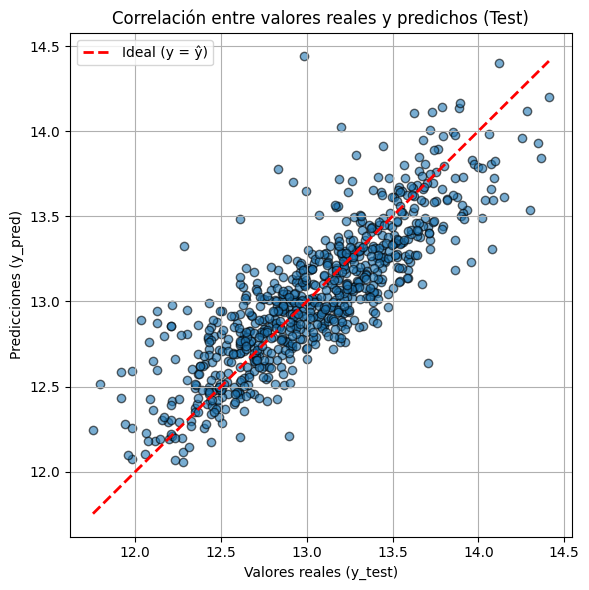

In [6]:
y_pred = mlr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


r = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Coeficiente de Pearson (r): {r:.4f}")

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2%}")
print(f"R²: {r2:.4f}")

# --- Gráfico de correlación ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Ideal (y = ŷ)')
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Correlación entre valores reales y predichos (Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()